In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks

In [2]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: line 146: blank doesn't take any effect anymore. please remove it from your fonts.conf


['/Library/Fonts/Microsoft/Gill Sans MT.ttf',
 '/System/Library/Fonts/Apple Braille.ttf',
 '/Library/Fonts/Wildberry-Regular.ttf',
 '/Library/Fonts/TektonPro-Bold.otf',
 '/System/Library/Fonts/Supplemental/NotoSansKhudawadi-Regular.ttf',
 '/Library/Fonts/Microsoft/Times New Roman.ttf',
 '/System/Library/Fonts/Supplemental/NISC18030.ttf',
 '/Users/jmp/Library/Fonts/Aller_Lt.ttf',
 '/System/Library/Fonts/Supplemental/Farisi.ttf',
 '/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf',
 '/Library/Fonts/Microsoft/Franklin Gothic Medium Italic.ttf',
 '/Library/Fonts/Flashlight-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Shree714.ttc',
 '/System/Library/Fonts/Supplemental/Khmer MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf',
 '/Users/jmp/Library/Fonts/ITCKRIST.TTF',
 '/Library/Fonts/BlackoakStd.otf',
 '/Library/Fonts/KozGoP

In [3]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

'/Users/jmp/Library/Fonts/Roboto-Regular.ttf'

In [4]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [5]:
BITCOIN_PRICE_DATAFILE = 'bitcoin-price-usd - June 2023.csv'
MVRV_Z_SCORE_DATAFILE = 'bitcoin-mvrv-z-score - May 2023.csv'

In [6]:
FOA_START_DATE = dt.fromisoformat('2019-11-19').date()
FOA_END_DATE = dt.fromisoformat('2022-04-30').date()
FUND_START_DATE = dt.fromisoformat('2022-05-01').date()
FUND_END_DATE = dt.fromisoformat('2023-06-30').date()

# Load Bitcoin Price Data (Bitstamp via CryptoDataDownload.com)

In [7]:
df = pd.read_csv(BITCOIN_PRICE_DATAFILE, skiprows=1)
df['timestamp'] = pd.to_datetime(df.unix, unit='s')
df.rename(columns={'close': 'Bitcoin'}, inplace=True)
df['Date'] = df.timestamp.dt.date
df.index = df.timestamp.dt.date
df.dtypes

unix                   int64
date                  object
symbol                object
open                 float64
high                 float64
low                  float64
Bitcoin              float64
Volume BTC           float64
Volume USD           float64
timestamp     datetime64[ns]
Date                  object
dtype: object

# Load MVRV Price Data (glassnode.com)

In [8]:
tempdf = pd.read_csv(MVRV_Z_SCORE_DATAFILE)
tempdf.timestamp = pd.to_datetime(tempdf.timestamp)
tempdf.rename(columns={'value': 'MVRV Z-Score'}, inplace=True)
tempdf['Date'] = tempdf.timestamp.dt.date
tempdf.index = tempdf.timestamp.dt.date
tempdf.dtypes

timestamp       datetime64[ns, UTC]
MVRV Z-Score                float64
Date                         object
dtype: object

In [9]:
merged_df = pd.merge(df, tempdf, how='inner', on='Date')
merged_df

,unix,date,symbol,open,high,low,Bitcoin,Volume BTC,Volume USD,timestamp_x,Date,timestamp_y,MVRV Z-Score
0,1685750400,2023-06-03 00:00:00,BTC/USD,"27,250.0000","27,332.0000","26,937.0000","27,076.0000",772.4219,"20,914,096.2262",2023-06-03,2023-06-03,2023-06-03 00:00:00+00:00,0.5071
1,1685664000,2023-06-02 00:00:00,BTC/USD,"26,821.0000","27,300.0000","26,519.0000","27,251.0000","1,671.4345","45,548,260.3605",2023-06-02,2023-06-02,2023-06-02 00:00:00+00:00,0.5194
2,1685577600,2023-06-01 00:00:00,BTC/USD,"27,220.0000","27,356.0000","26,625.0000","26,826.0000","2,004.3572","53,768,886.3183",2023-06-01,2023-06-01,2023-06-01 00:00:00+00:00,0.4873
3,1685491200,2023-05-31 00:00:00,BTC/USD,"27,701.0000","27,840.0000","26,857.0000","27,219.0000","1,863.4763","50,721,960.1214",2023-05-31,2023-05-31,2023-05-31 00:00:00+00:00,0.5211
4,1685404800,2023-05-30 00:00:00,BTC/USD,"27,748.0000","28,054.0000","27,570.0000","27,706.0000","1,567.5512","43,430,572.8565",2023-05-30,2023-05-30,2023-05-30 00:00:00+00:00,0.5545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,1417478400,2014-12-02 00:00:00,BTC/USD,378.3900,382.8600,375.2300,379.2500,"2,593,576.4600","6,832.5300",2014-12-02,2014-12-02,2014-12-02 00:00:00+00:00,0.2210
3106,1417392000,2014-12-01 00:00:00,BTC/USD,376.4000,382.3100,373.0300,378.3900,"2,520,662.3700","6,660.5600",2014-12-01,2014-12-01,2014-12-01 00:00:00+00:00,0.2097
3107,1417305600,2014-11-30 00:00:00,BTC/USD,376.5700,381.9900,373.3200,373.3400,"1,145,566.6100","3,046.3300",2014-11-30,2014-11-30,2014-11-30 00:00:00+00:00,0.2080
3108,1417219200,2014-11-29 00:00:00,BTC/USD,376.4200,386.6000,372.2500,376.7200,"2,746,157.0500","7,245.1900",2014-11-29,2014-11-29,2014-11-29 00:00:00+00:00,0.2030


In [10]:
df = merged_df[['Date', 'Bitcoin', 'MVRV Z-Score']]
df.index = df.Date
df

,Date,Bitcoin,MVRV Z-Score
Date,,,
2023-06-03,2023-06-03,"27,076.0000",0.5071
2023-06-02,2023-06-02,"27,251.0000",0.5194
2023-06-01,2023-06-01,"26,826.0000",0.4873
2023-05-31,2023-05-31,"27,219.0000",0.5211
2023-05-30,2023-05-30,"27,706.0000",0.5545
...,...,...,...
2014-12-02,2014-12-02,379.2500,0.2210
2014-12-01,2014-12-01,378.3900,0.2097
2014-11-30,2014-11-30,373.3400,0.2080


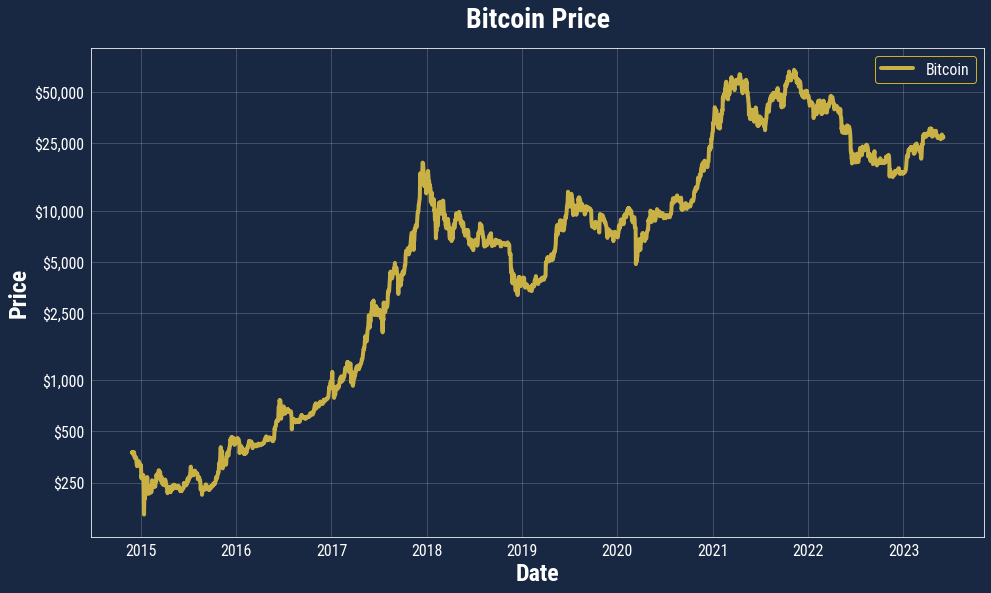

In [11]:
ax = df[['Bitcoin']].plot(title='Bitcoin Price', logy=True, color={'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)


ax.get_figure().savefig('bitcoin_price.pdf', format='pdf')


# 200 Week SMA Chart

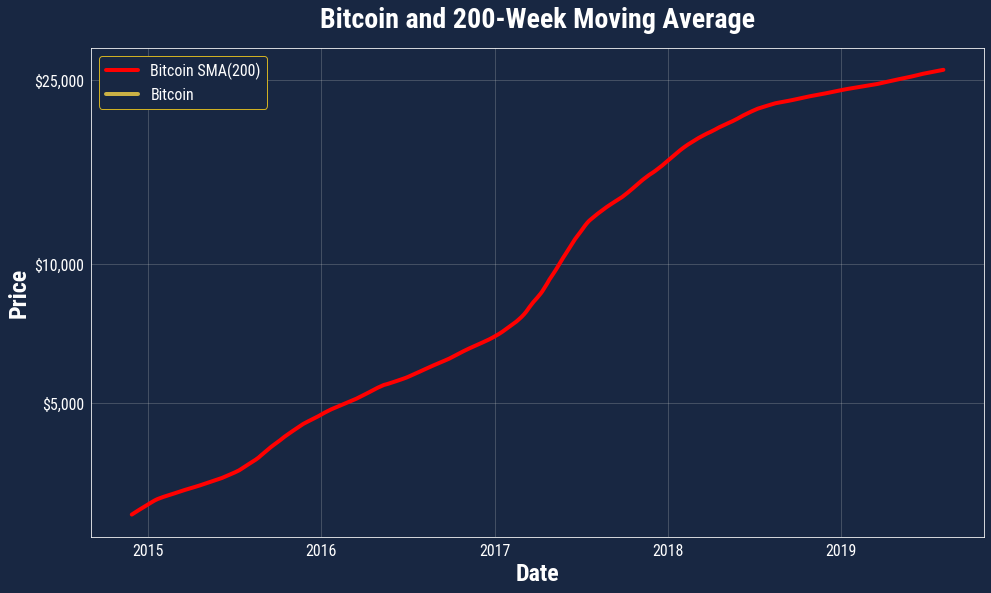

In [12]:
sample_start = FOA_START_DATE - timedelta(days=1400)
sample = df[sample_start:FUND_END_DATE].copy()
sample['Bitcoin SMA(200)'] = df[['Bitcoin']].rolling(1400).mean()
ax = sample[['Bitcoin SMA(200)', 'Bitcoin']].plot.line(title='Bitcoin and 200-Week Moving Average', logy=True, color={'Bitcoin SMA(200)': 'red', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)

ax.get_figure().savefig('graph-btc-sma-200.pdf', format='pdf')
sample[['Bitcoin SMA(200)', 'Bitcoin']].to_csv('bitcoin-weeky-sma-200.csv')

# Halving Chart

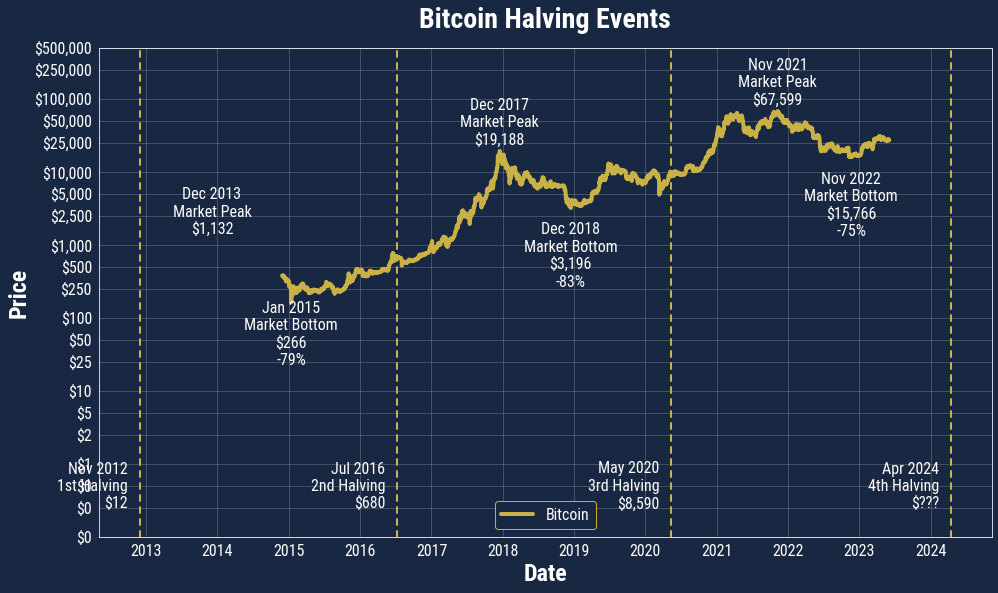

In [13]:
ax = df[['Bitcoin']].plot(title='Bitcoin Halving Events', logy=True, color={'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.set_ylim([.1, 500000])

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)


halving_events = [
    {
        'date': dt(2012, 11, 28),
        'price': 12.5,
        'name': '1st Halving',
    },
    {
        'date': dt(2016, 7, 9),
        'price': 680,
        'name': '2nd Halving',
    },
    {
        'date': dt(2020, 5, 11),
        'price': 8590,
        'name': '3rd Halving',
    },
    {
        'date': dt(2024, 4, 15),
        'price': 100000,
        'name': '4th Halving',
        'price_override': '???',
    },
]

for he in halving_events:
    datestr = he['date'].strftime("%b %Y")
    halving_name = he['name']
    if 'price_override' in he:
        halving_price_str = he['price_override']
    else:
        halving_price_str = '{:,.0f}'.format(he['price'])
    ax.axvline(he['date'], color='#CAB145', dashes=(3, 3), linewidth=2, dash_capstyle="round")
    ax.text(he['date'] - timedelta(days=60), .25, f'{datestr}\n{halving_name}\n${halving_price_str}', color='#ffffff', horizontalalignment='right')
    

market_tops = [
    {
        'date': dt(2013, 12, 4),
        'price': 1132,
    },
    {
        'date': dt(2017, 12, 16),
        'price': 19188,
    },
    {
        'date': dt(2021, 11, 8),
        'price': 67599,
    },
]
    
for mt in market_tops:
    datestr = mt['date'].strftime("%b %Y")
    if 'price_override' in mt:
        price_str = mt['price_override']
    else:
        price_str = '{:,.0f}'.format(mt['price'])
    ax.text(mt['date'], mt['price'] * 1.25, f'{datestr}\nMarket Peak\n${price_str}', color='#ffffff', horizontalalignment='center')
    
market_bottoms = [
    {
        'date': dt(2015, 1, 13),
        'price': 266,
        'drawdown': -.79,
    },
    {
        'date': dt(2018, 12, 14),
        'price': 3196,
        'drawdown': -.83,
    },
    {
        'date': dt(2022, 11, 21),
        'price': 15766,
        'drawdown': -0.75,
    },
]

for mb in market_bottoms:
    datestr = mb['date'].strftime("%b %Y")
    drawdown_str = '{:.0f}%'.format(mb['drawdown'] * 100.)
    if 'price_override' in mb:
        price_str = mb['price_override']
    else:
        price_str = '{:,.0f}'.format(mb['price'])
    ax.text(mb['date'], mb['price'] * .65, f'{datestr}\nMarket Bottom\n${price_str}\n{drawdown_str}', color='#ffffff', horizontalalignment='center', verticalalignment='top')

    
ax.get_figure().savefig('bitcoin_halving_chart.pdf', format='pdf')


# MVRV Z-Score Index

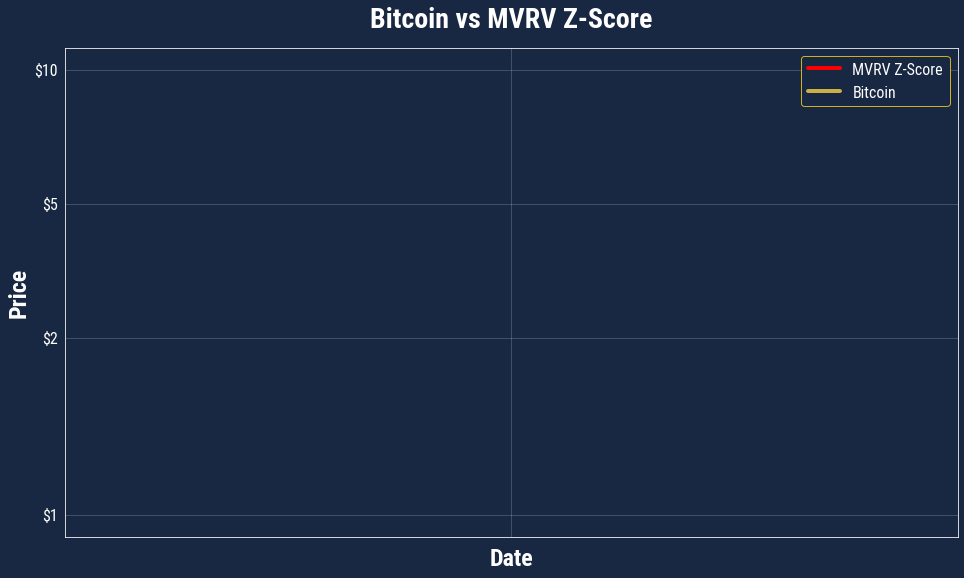

In [14]:
sample_start = FOA_START_DATE 
sample = df[:FUND_END_DATE].copy()
# sample['Bitcoin SMA(200)'] = df[['Bitcoin']].rolling(1400).mean()
ax = sample[['MVRV Z-Score', 'Bitcoin']].plot.line(title='Bitcoin vs MVRV Z-Score', logy=True, color={'MVRV Z-Score': 'red', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
# ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)
ax.get_figure().savefig('graph-mvrv-z-score.pdf', format='pdf')
sample[['MVRV Z-Score', 'Bitcoin']].to_csv('mvrv-z-score.csv')

In [15]:
sample

,Date,Bitcoin,MVRV Z-Score
Date,,,
